## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.011342 -0.158171  0.462918  1.084628 -1.202227  0.805019
1 -0.693917 -0.674497  0.492946 -0.752970 -1.365759 -1.672782
2 -0.758123 -1.474506 -0.223192  1.369419 -1.065201 -0.877488
3  0.219833 -1.636023 -0.142053  0.601852  0.268639 -1.027214
4  1.019579 -0.929955  0.471365 -0.509108 -0.026738 -0.577426


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0531624	total: 57.3ms	remaining: 57.2s
1:	learn: 1.0422476	total: 57.7ms	remaining: 28.8s
2:	learn: 1.0317985	total: 58.1ms	remaining: 19.3s
3:	learn: 1.0209810	total: 58.7ms	remaining: 14.6s
4:	learn: 1.0099221	total: 59.1ms	remaining: 11.8s
5:	learn: 1.0002040	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9906652	total: 60.1ms	remaining: 8.53s
7:	learn: 0.9809918	total: 60.7ms	remaining: 7.53s
8:	learn: 0.9718852	total: 61.1ms	remaining: 6.73s
9:	learn: 0.9619793	total: 61.5ms	remaining: 6.09s
10:	learn: 0.9525095	total: 61.8ms	remaining: 5.56s
11:	learn: 0.9426188	total: 62.3ms	remaining: 5.13s
12:	learn: 0.9338746	total: 62.8ms	remaining: 4.77s
13:	learn: 0.9246388	total: 63.2ms	remaining: 4.45s
14:	learn: 0.9168220	total: 63.7ms	remaining: 4.18s
15:	learn: 0.9081166	total: 64.1ms	remaining: 3.94s
16:	learn: 0.8993186	total: 64.5ms	remaining: 3.73s
17:	learn: 0.8907412	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8812874	total: 65.6ms	remaining

99:	learn: 0.4360486	total: 105ms	remaining: 941ms
100:	learn: 0.4327415	total: 105ms	remaining: 935ms
101:	learn: 0.4292843	total: 106ms	remaining: 929ms
102:	learn: 0.4263611	total: 106ms	remaining: 921ms
103:	learn: 0.4230620	total: 106ms	remaining: 916ms
104:	learn: 0.4201123	total: 107ms	remaining: 910ms
105:	learn: 0.4171969	total: 107ms	remaining: 904ms
106:	learn: 0.4142313	total: 108ms	remaining: 897ms
107:	learn: 0.4113609	total: 108ms	remaining: 893ms
108:	learn: 0.4078104	total: 109ms	remaining: 887ms
109:	learn: 0.4046693	total: 109ms	remaining: 882ms
110:	learn: 0.4012276	total: 109ms	remaining: 877ms
111:	learn: 0.3979612	total: 110ms	remaining: 871ms
112:	learn: 0.3951978	total: 110ms	remaining: 867ms
113:	learn: 0.3921910	total: 111ms	remaining: 861ms
114:	learn: 0.3896097	total: 111ms	remaining: 856ms
115:	learn: 0.3869873	total: 112ms	remaining: 851ms
116:	learn: 0.3837669	total: 112ms	remaining: 846ms
117:	learn: 0.3805202	total: 113ms	remaining: 842ms
118:	learn: 0

268:	learn: 0.1432891	total: 187ms	remaining: 509ms
269:	learn: 0.1424682	total: 188ms	remaining: 508ms
270:	learn: 0.1418652	total: 188ms	remaining: 507ms
271:	learn: 0.1412621	total: 189ms	remaining: 505ms
272:	learn: 0.1405951	total: 189ms	remaining: 504ms
273:	learn: 0.1400695	total: 190ms	remaining: 503ms
274:	learn: 0.1394654	total: 190ms	remaining: 501ms
275:	learn: 0.1384576	total: 191ms	remaining: 501ms
276:	learn: 0.1376026	total: 191ms	remaining: 499ms
277:	learn: 0.1368353	total: 192ms	remaining: 498ms
278:	learn: 0.1362755	total: 192ms	remaining: 497ms
279:	learn: 0.1356298	total: 193ms	remaining: 495ms
280:	learn: 0.1348765	total: 193ms	remaining: 494ms
281:	learn: 0.1340488	total: 193ms	remaining: 493ms
282:	learn: 0.1330516	total: 194ms	remaining: 491ms
283:	learn: 0.1319649	total: 194ms	remaining: 489ms
284:	learn: 0.1310190	total: 195ms	remaining: 488ms
285:	learn: 0.1302039	total: 195ms	remaining: 487ms
286:	learn: 0.1295862	total: 195ms	remaining: 486ms
287:	learn: 

481:	learn: 0.0463381	total: 287ms	remaining: 309ms
482:	learn: 0.0461355	total: 288ms	remaining: 308ms
483:	learn: 0.0459376	total: 288ms	remaining: 307ms
484:	learn: 0.0456683	total: 289ms	remaining: 307ms
485:	learn: 0.0454760	total: 289ms	remaining: 306ms
486:	learn: 0.0452870	total: 290ms	remaining: 305ms
487:	learn: 0.0449821	total: 290ms	remaining: 305ms
488:	learn: 0.0447546	total: 291ms	remaining: 304ms
489:	learn: 0.0445900	total: 291ms	remaining: 303ms
490:	learn: 0.0443327	total: 292ms	remaining: 303ms
491:	learn: 0.0441524	total: 292ms	remaining: 302ms
492:	learn: 0.0439938	total: 293ms	remaining: 301ms
493:	learn: 0.0437428	total: 293ms	remaining: 300ms
494:	learn: 0.0435696	total: 294ms	remaining: 300ms
495:	learn: 0.0434169	total: 294ms	remaining: 299ms
496:	learn: 0.0431264	total: 295ms	remaining: 298ms
497:	learn: 0.0429643	total: 295ms	remaining: 297ms
498:	learn: 0.0427505	total: 296ms	remaining: 297ms
499:	learn: 0.0425102	total: 296ms	remaining: 296ms
500:	learn: 

653:	learn: 0.0213949	total: 370ms	remaining: 196ms
654:	learn: 0.0213216	total: 371ms	remaining: 195ms
655:	learn: 0.0212097	total: 371ms	remaining: 195ms
656:	learn: 0.0211351	total: 372ms	remaining: 194ms
657:	learn: 0.0210198	total: 372ms	remaining: 193ms
658:	learn: 0.0209067	total: 372ms	remaining: 193ms
659:	learn: 0.0207985	total: 373ms	remaining: 192ms
660:	learn: 0.0207434	total: 373ms	remaining: 192ms
661:	learn: 0.0206335	total: 374ms	remaining: 191ms
662:	learn: 0.0205136	total: 375ms	remaining: 191ms
663:	learn: 0.0204066	total: 375ms	remaining: 190ms
664:	learn: 0.0203036	total: 376ms	remaining: 189ms
665:	learn: 0.0202508	total: 376ms	remaining: 189ms
666:	learn: 0.0201468	total: 377ms	remaining: 188ms
667:	learn: 0.0200323	total: 377ms	remaining: 187ms
668:	learn: 0.0199310	total: 377ms	remaining: 187ms
669:	learn: 0.0198158	total: 378ms	remaining: 186ms
670:	learn: 0.0197542	total: 378ms	remaining: 186ms
671:	learn: 0.0196488	total: 379ms	remaining: 185ms
672:	learn: 

862:	learn: 0.0098151	total: 471ms	remaining: 74.8ms
863:	learn: 0.0097688	total: 472ms	remaining: 74.2ms
864:	learn: 0.0097203	total: 472ms	remaining: 73.7ms
865:	learn: 0.0097020	total: 473ms	remaining: 73.2ms
866:	learn: 0.0096710	total: 473ms	remaining: 72.6ms
867:	learn: 0.0096552	total: 474ms	remaining: 72ms
868:	learn: 0.0096447	total: 474ms	remaining: 71.5ms
869:	learn: 0.0096141	total: 475ms	remaining: 70.9ms
870:	learn: 0.0096021	total: 475ms	remaining: 70.4ms
871:	learn: 0.0095903	total: 476ms	remaining: 69.8ms
872:	learn: 0.0095801	total: 476ms	remaining: 69.3ms
873:	learn: 0.0095502	total: 477ms	remaining: 68.7ms
874:	learn: 0.0095387	total: 477ms	remaining: 68.2ms
875:	learn: 0.0095273	total: 478ms	remaining: 67.6ms
876:	learn: 0.0095162	total: 478ms	remaining: 67.1ms
877:	learn: 0.0095058	total: 479ms	remaining: 66.5ms
878:	learn: 0.0094765	total: 479ms	remaining: 66ms
879:	learn: 0.0094663	total: 480ms	remaining: 65.4ms
880:	learn: 0.0094363	total: 480ms	remaining: 64.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

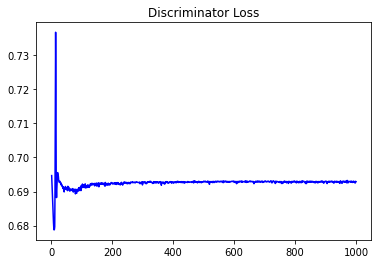

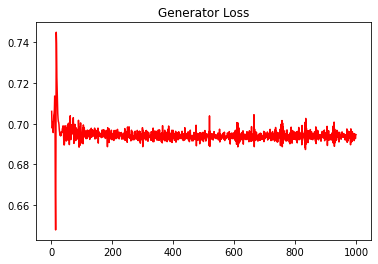

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08214868242402218


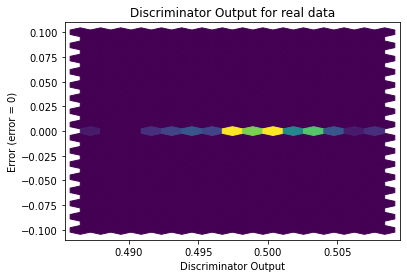

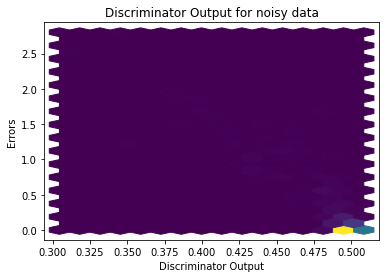

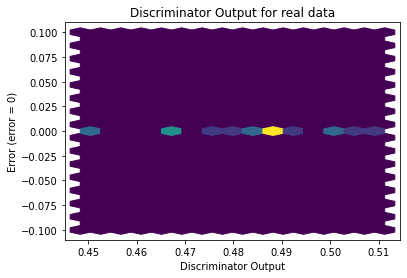

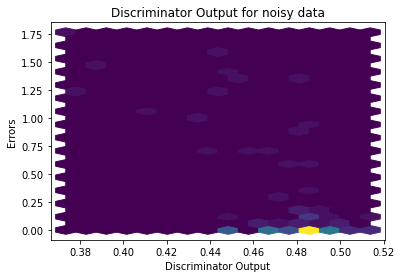

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


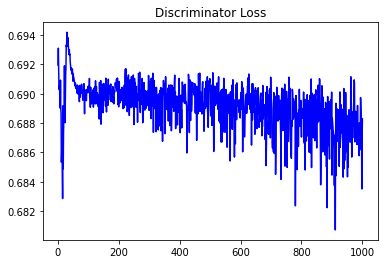

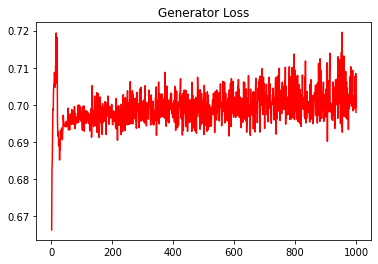

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.054506431625530816


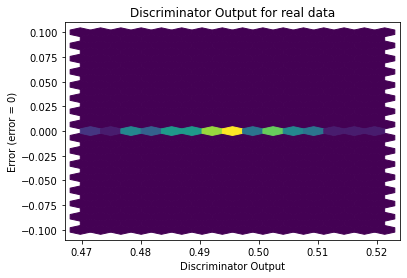

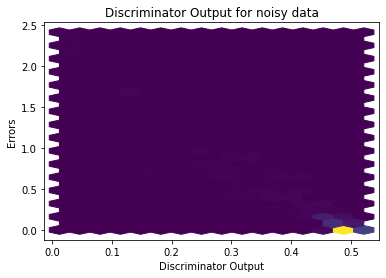

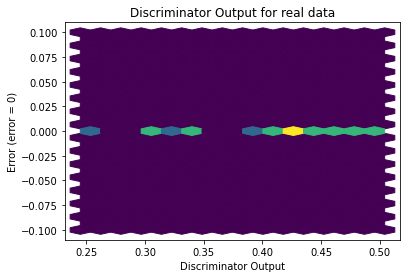

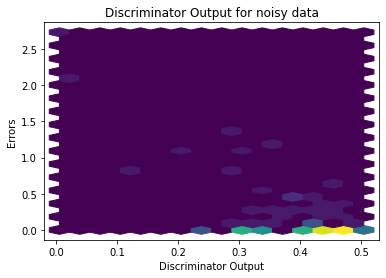

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1280]], requires_grad=True)
